## Data Visualization

The dataset used is subset of 'LA Restaurant & Market Health Data' and contains the inspection results of restaurants and markets in Los Angeles in 2015-2018. Another dataset listing all the inspections in LA in the same time period is also provided and will be used to assist data visualization on the current dataset.

The dataset contains information including inspection date, facility name, violation code and description, facility address, facility score, and other information.

Here's the link to the dataset: https://www.kaggle.com/cityofLA/la-restaurant-market-health-data/downloads/la-restaurant-market-health-data.zip/23

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

%matplotlib inline
plt.rcParams['figure.figsize'] = (6,6)

### Load Dataset

In [4]:
violate = pd.read_csv('la-restaurant-market-health-data/restaurant-and-market-health-violations.csv')

In [5]:
violate.head()

,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,...,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,service_code,service_description,row_id
0,DA08R0TCU,2018-03-30T00:00:00.000,KRUANG TEDD,F030,# 30. Food properly stored; food storage conta...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF030
1,DA08R0TCU,2018-03-30T00:00:00.000,KRUANG TEDD,F027,# 27. Food separated and protected,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF027
2,DA08R0TCU,2018-03-30T00:00:00.000,KRUANG TEDD,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF035
3,DA08R0TCU,2018-03-30T00:00:00.000,KRUANG TEDD,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF033
4,DA08R0TCU,2018-03-30T00:00:00.000,KRUANG TEDD,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF029


In [6]:
violate.dtypes

serial_number            object
activity_date            object
facility_name            object
violation_code           object
violation_description    object
violation_status         object
points                    int64
grade                    object
facility_address         object
facility_city            object
facility_id              object
facility_state           object
facility_zip             object
employee_id              object
owner_id                 object
owner_name               object
pe_description           object
program_element_pe        int64
program_name             object
program_status           object
record_id                object
score                     int64
service_code              int64
service_description      object
row_id                   object
dtype: object

Drop columns that are not needed:

In [7]:
violate = violate.drop(columns=['serial_number', 'record_id', 'service_code', 'service_description', 'row_id', 'facility_state', 'owner_id'])


### Compare the number of violations in each year. 

Because the inspections in 2018 only go till March, 2018 will be dropped here for accurate comparisons.

In [8]:
violate['year'] = pd.to_datetime(violate.activity_date).apply(lambda x: x.strftime('%Y'))
violate['year_month'] = pd.to_datetime(violate.activity_date).apply(lambda x: x.strftime('%Y-%m'))
violate['year_month'].head()

0    2018-03
1    2018-03
2    2018-03
3    2018-03
4    2018-03
Name: year_month, dtype: object

In [9]:
# keeping only one entry for each restaurant for each inspection

violate_unique_fac = violate.drop_duplicates(subset=['year_month', 'facility_name'])
violate_unique_fac.head()

,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,facility_id,facility_zip,employee_id,owner_name,pe_description,program_element_pe,program_name,program_status,score,year,year_month
0,2018-03-30T00:00:00.000,KRUANG TEDD,F030,# 30. Food properly stored; food storage conta...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,90027,EE0000857,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,92,2018,2018-03
7,2018-03-30T00:00:00.000,SPROUTS FARMERS MARKET#403,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,1,A,2245 YOSEMITE DR,LOS ANGELES,FA0224114,90041-2618,EE0000162,"SPROUTS, INC.","FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,MEAT MARKET,ACTIVE,97,2018,2018-03
10,2018-03-30T00:00:00.000,LOS ANGELES NEW YORK PIZZA,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,1,A,518 W 6TH ST,LOS ANGELES,FA0022748,90014,EE0000721,JAYSUKHGHQI T PATEL,RESTAURANT (31-60) SEATS MODERATE RISK,1634,LOS ANGELES NEW YORK PIZZA,ACTIVE,92,2018,2018-03
15,2018-03-30T00:00:00.000,THE BAGEL FACTORY,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE,1,A,8984 CADILLAC AVE,LOS ANGELES,FA0051619,90034,EE0000727,"SANFORD, BRODY",RESTAURANT (0-30) SEATS MODERATE RISK,1631,THE BAGEL FACTORY,ACTIVE,93,2018,2018-03
22,2018-03-30T00:00:00.000,CREPE EXPRESS,F014,# 14. Food contact surfaces: clean and sanitized,OUT OF COMPLIANCE,2,A,529 W 6TH ST,LOS ANGELES,FA0017227,90014,EE0000721,THE MAGIC GRIDDLES INC.,RESTAURANT (0-30) SEATS MODERATE RISK,1631,CREPE EXPRESS,ACTIVE,92,2018,2018-03


In [11]:
# Count number of facilities and select entries from 2015-2017
uni_vio = violate_unique_fac.groupby('year').count()['facility_name'].tolist()[0:3]
year_no18 = ['2015', '2016', '2017']
uni_vio

[4551, 20578, 18664]

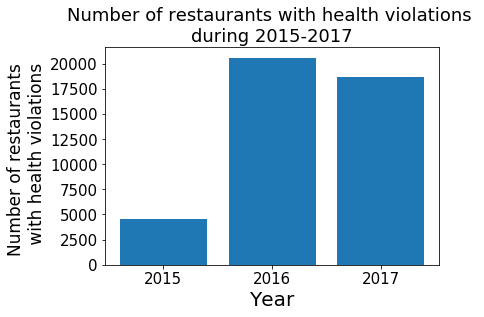

In [12]:
# plot number of violations per year

plt.bar(year_no18, uni_vio)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of restaurants \n with health violations', fontsize=17)
plt.title('Number of restaurants with health violations \nduring 2015-2017', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

It seems like 2016 and 2017 had a lot more restaurants with health violations than in 2015. However, we don't know the total number of inspections made in each year - maybe inspections in 2016 and 2017 were more frequent and led to more cases of reported violations.

I will then look at the inspection numbers for each year.

In [13]:
inspect = pd.read_csv('la-restaurant-market-health-data/restaurant-and-market-health-inspections.csv')
inspect.head()

,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,facility_id,facility_state,facility_zip,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id
0,DAJ00E07B,2017-12-29T00:00:00.000,HABITAT COFFEE SHOP,95,A,1,ROUTINE INSPECTION,EE0000923,3708 N EAGLE ROCK BLVD,LOS ANGELES,FA0170465,CA,90065,OW0178123,GLASSELL COFFEE SHOP LLC,RESTAURANT (0-30) SEATS MODERATE RISK,1631,HABITAT COFFEE SHOP,ACTIVE,PR0160774
1,DAQOKRFZB,2017-12-29T00:00:00.000,REILLY'S,92,A,1,ROUTINE INSPECTION,EE0000633,100 WORLD WAY # 120,LOS ANGELES,FA0244690,CA,90045,OW0208441,"AREAS SKYVIEW LAX JV, LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631,REILLY'S,ACTIVE,PR0193026
2,DASJI4LUR,2017-12-29T00:00:00.000,STREET CHURROS,93,A,1,ROUTINE INSPECTION,EE0000835,6801 HOLLYWOOD BLVD # 253,LOS ANGELES,FA0224109,CA,90028,OW0228670,"STREETCHURROS, INC",RESTAURANT (0-30) SEATS LOW RISK,1630,STREET CHURROS,ACTIVE,PR0179282
3,DA40LU5AT,2017-12-29T00:00:00.000,TRINITI ECHO PARK,94,A,1,ROUTINE INSPECTION,EE0000923,1814 W SUNSET BLVD,LOS ANGELES,FA0252528,CA,90026-3227,OW0246287,AMERICAN HOSPITALITY,RESTAURANT (0-30) SEATS MODERATE RISK,1631,TRINITI ECHO PARK,ACTIVE,PR0201836
4,DAXV2RMYC,2017-12-29T00:00:00.000,POLLEN,94,A,1,ROUTINE INSPECTION,EE0000923,2100 ECHO PARK AVE,LOS ANGELES,FA0252789,CA,90026,OW0246479,"POLLEN AND PASTRY , LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631,POLLEN,ACTIVE,PR0202148


In [14]:
inspect['year'] = pd.to_datetime(inspect.activity_date).dt.year
inspect.groupby('year').count()['facility_name']

year
2015     9502
2016    23106
2017    21116
2018    13849
Name: facility_name, dtype: int64

As expected, the number of inspections in 2015 is much less than those in 2016 and 2017. Therefore, we should compare **the percentage** of the restaurants with violations for each year.

In [15]:
ins_num = inspect.groupby('year').count()['facility_name'].tolist()[0:3]
vio_rate = []
for i in range(3):
    vio_rate.append(uni_vio[i]/ins_num[i]*100)
    
vio_rate

[47.89517996211324, 89.05911884359041, 88.38795226368632]

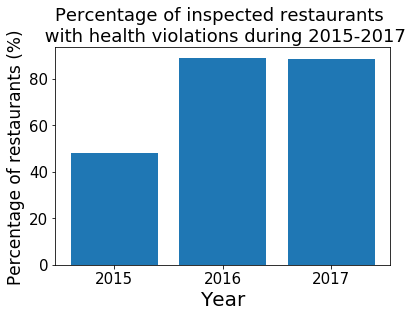

In [16]:
# plot the percentage of inspected restaurants with violations for each year

plt.bar(year_no18, vio_rate)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Percentage of restaurants (%)', fontsize=17)
plt.title('Percentage of inspected restaurants \n with health violations during 2015-2017', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

The graph above shows that 2016 & 2017 have very high percentages for restaurant violations, both around 90%, while 2015 had around 50% restaurants that had health violations.

One possible explanation might be the inspections had a stricter criteria for determining health violations.

### Which restaurants have the most violations?

Next, we're interested in the restaurants with the most violations, counting different types of violations.

In [17]:
top10 = violate.groupby('facility_name').count()[['violation_code']].sort_values(by='violation_code', ascending=False).head(10)
violate.loc[violate.facility_name=='DODGER STADIUM']

,violation_code
facility_name,
DODGER STADIUM,1292
STAPLES CENTER (LEVY),1073
LA COLISEUM,679
THE COFFEE BEAN & TEA LEAF,583
7-ELEVEN,505
WHOLE FOODS MARKET,487
HONG KONG EXPRESS,441
SUBWAY,428
EL SUPER,402


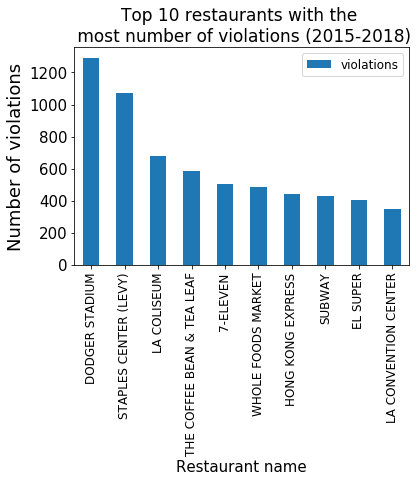

In [18]:
# create a bar graph 
top10.plot.bar()
plt.xlabel('Restaurant name', fontsize=15)
plt.ylabel('Number of violations', fontsize=18)
plt.title('Top 10 restaurants with the \n most number of violations (2015-2018)', fontsize=17)
plt.legend(['violations'], fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15);

Restaurants in 'Dodger Stadium' and 'Staples center (Levi)' had the most number of violations during 2015-2018, both had over 1000 cases.

Note that 4 of the top 10 restaurants were places with lots of people (Dodger stadium, staples center, LA coliseum, LA convention center). This makes sense since places with more people may have more health/hygiene issues.

Another thing to notice is that almost all of the top 10 restaurants are fast food restaurants, suggesting that fast food may bring more health-related issues (other than making you fat!)

### What types of violations are the most common?

In [19]:
code = violate.groupby(['year', 'violation_code', 'violation_description'], as_index=False).count()[['year', 'violation_code', 'violation_description', 'violation_status']].sort_values(by=['year', 'violation_status'], ascending=False)

# select the 5 most common violation code for each year
year = ['2015', '2016', '2017', '2018']

top5_2015 = code.loc[code.year=='2015'].head()
top5_2016 = code.loc[code.year=='2016'].head()
top5_2017 = code.loc[code.year=='2017'].head()
top5_2018 = code.loc[code.year=='2018'].head()

top5_code = pd.concat([top5_2015, top5_2016, top5_2017, top5_2018])
    
top5_code


,year,violation_code,violation_description,violation_status
40,2015,F044,"# 44. Floors, walls and ceilings: properly bui...",3114
29,2015,F033,# 33. Nonfood-contact surfaces clean and in go...,2824
31,2015,F035,# 35. Equipment/Utensils - approved; installed...,2334
36,2015,F040,"# 40. Plumbing: Plumbing in good repair, prope...",1543
32,2015,F036,"# 36. Equipment, utensils and linens: storage ...",1461
92,2016,F044,"# 44. Floors, walls and ceilings: properly bui...",12739
81,2016,F033,# 33. Nonfood-contact surfaces clean and in go...,12332
83,2016,F035,# 35. Equipment/Utensils - approved; installed...,10218
84,2016,F036,"# 36. Equipment, utensils and linens: storage ...",6478
88,2016,F040,"# 40. Plumbing: Plumbing in good repair, prope...",6434


As we can see, # 44 (Floors, wells, and ceilings not properly built, maintained, repaired, or cleaned) is the most common reason for violation in all 4 years. # 33 (non-food contact surfaces not clean), # 35 (Equipment/utensil issues), # 36 (equipment, utensils, and linens not properly stored) were in the top 5 for all 4 years.

An interesting thing is that the top 3 violation reasons in 4 years were the same: #44, #33, #35. I will graph these top 3 for 2015, for example:

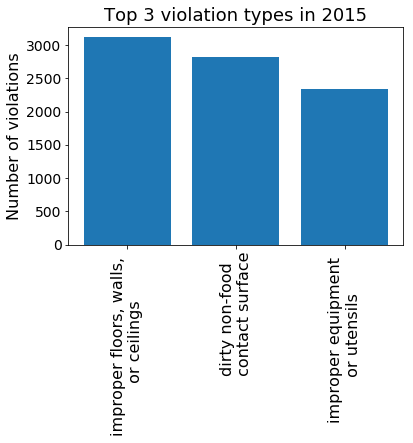

In [28]:
plt.bar(top5_2015['violation_code'][:3], top5_2015['violation_status'][:3])
vio_des = ['improper floors, walls, \n or ceilings', 'dirty non-food \n contact surface', 'improper equipment \n or utensils']
plt.xticks(np.arange(3), vio_des, rotation = 90, fontsize = 16)
plt.yticks(fontsize=14)
plt.ylabel('Number of violations', fontsize=16)
plt.title('Top 3 violation types in 2015', fontsize=18);

I will then demonstrate the total number of violations in 4 years for the top 5 violation types in each year:

In [35]:
vio_num_total = top5_code.groupby('violation_code')[['violation_status']].sum().sort_values(by='violation_status', ascending=False)
vio_num_total

,violation_status
violation_code,
F044,34843
F033,32515
F035,27210
F036,17532
F043,9384
F040,7977


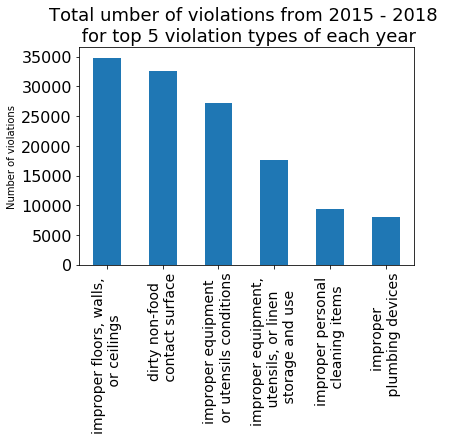

In [40]:
vio_num_total.plot.bar(legend=None)
plt.title('Total umber of violations from 2015 - 2018 \n for top 5 violation types of each year', fontsize = 18)
vio_des = ['improper floors, walls, \n or ceilings', 'dirty non-food \n contact surface', \
           'improper equipment \n or utensils conditions', \
           'improper equipment, \n utensils, or linen \n storage and use', \
           'improper personal \n cleaning items', 'improper \n plumbing devices']
plt.xticks(np.arange(6), vio_des, fontsize = 14)
plt.yticks(fontsize=16)
plt.ylabel('Number of violations')
plt.xlabel(None);

## Mapping inspection results

In [43]:
violate['facility_zip'].head(10)

0         90027
1         90027
2         90027
3         90027
4         90027
5         90027
6         90027
7    90041-2618
8    90041-2618
9    90041-2618
Name: facility_zip, dtype: object

Some of the zip codes have a 4-digit number attached for mail sorting, we can safely drop them for visualization purpose.

In [45]:
def clean_zip(code):
    return code[:5]
violate['facility_zip'] = violate['facility_zip'].apply(clean_zip)
violate['facility_zip'].head(10)

0    90027
1    90027
2    90027
3    90027
4    90027
5    90027
6    90027
7    90041
8    90041
9    90041
Name: facility_zip, dtype: object

Calculate average score for each area.

In [54]:
geo_group = violate.groupby('facility_zip', as_index=False)[['facility_id', 'score']]
geo_avg = geo_group.agg({'score': np.mean, 'facility_id': pd.Series.nunique})
geo_avg.rename(columns={'score': 'average_score', 'facility_id': 'total_facilities'}, inplace=True)
geo_avg.head()

,facility_zip,average_score,total_facilities
0,90001,91.658718,285
1,90002,93.065327,69
2,90003,90.763119,289
3,90004,91.437777,287
4,90005,89.304335,306


In [61]:
cd 'la-restaurant-market-health-data/'

/Users/quwd/Documents/iXperience/Class/la-restaurant-market-health-data


In [57]:
import json
# load GeoJSON
with open('la-zip-code-areas-2012.geojson', 'r') as jsonFile:
    data = json.load(jsonFile)
tmp = data

# remove ZIP codes not in our dataset
geozips = []
for i in range(len(tmp['features'])):
    if tmp['features'][i]['properties']['name'] in list(geo_avg['facility_zip'].unique()):
        geozips.append(tmp['features'][i])

# creating new JSON object
new_json = dict.fromkeys(['type','features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips

# save JSON object as updated-file
open("updated-file.json", "w").write(
    json.dumps(new_json, sort_keys=True, indent=4, separators=(',', ': '))
)

1181411

In [64]:
import folium

def create_map(table, zips, mapped_feature, add_text = ''):
    # reading of the updated GeoJSON file
    la_geo = r'updated-file.json'
    # initiating a Folium map with LA's longitude and latitude
    m = folium.Map(location = [34.0522, -118.2437], zoom_start = 11)
    # creating a choropleth map
    m.choropleth(
        geo_data = la_geo,
        fill_opacity = 0.7,
        line_opacity = 0.2,
        data = table,
        # refers to which key within the GeoJSON to map the ZIP code to
        key_on = 'feature.properties.name',
        # first element contains location information, second element contains feature of interest
        columns = [zips, mapped_feature],
        fill_color = 'RdYlGn',
        legend_name = (' ').join(mapped_feature.split('_')).title() + ' ' + add_text + ' Across LA'
    )
    folium.LayerControl().add_to(m)
    # save map with filename based on the feature of interest
    m.save(outfile = mapped_feature + '_map.html')
    return(m)

Visualize restaurant scores in LA:

In [65]:
create_map(geo_avg, 'facility_zip', 'average_score', 'of Facilities')

We can see that most areas have average restaurant scores above 90, with 3 above 96. No area has average score below 89.

Next, we can look at the total number of facilities that have at least one violation during inspection from 2015-2018:

In [66]:
create_map(geo_avg, 'facility_zip', 'total_facilities')

Note that red means there are fewer restaurants with health violations, which is better. 

We see that the areas with fewer violated resaurants are those farther away from the city center. This might first suggest that more restaurants in those ares are doing better in health regulations. However, I think it might be because those areas have fewer people and resaurants, so naturally they should have less restaurants with violations, and because the restaurants with most violations are mostly in a populous area, the suburb regions have less risk in violating health inspection rules. 

The overall trend is that the number of restaurants with violations increase as moving towards the center, with the exception of the area on the lower left of LA. A quick check on the demographics of this area showed that it has more people than other outer areas. For example, its population is more than 3 times than the one to its left.